In [1]:
import time
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from bokeh.palettes import inferno

import tensorflow as tf
from tensorflow.contrib.learn import DNNRegressor
tf.logging.set_verbosity(tf.logging.INFO)

Instructions for updating:
Use the retry module or similar alternatives.


# Deep Neural Network (DNN)
## Approximation einer eindimensionalen statischen Nichtlinearität mit Hilfe eines Neural Networks

### $\mathcal{NL}(u) = 3 \arctan(2u) + 5$

In [2]:
def nl(u):
    # zu lernende Nichtlinearität
    return 3 * np.arctan(2*u) + 5

def gerade(a,b,x):
    return a * x + b

k = 1000
x = np.reshape(np.linspace(-5, 5, k), (k, 1))

def training_input_fn(batch_size=1, num_epochs=None):
    return tf.estimator.inputs.numpy_input_fn(x={'X': x.astype(np.float32)},
                                              y=nl(x).astype(np.float32),
                                              batch_size=batch_size,
                                              num_epochs=num_epochs,
                                              shuffle=True)

feature_columns = [tf.feature_column.numeric_column('X', shape=(1,))]

STEPS_PER_EPOCH = 1000
EPOCHS = 1000
BATCH_SIZE = 100

hidden_layers = [16, 16, 16, 16, 16]

dnn = DNNRegressor(feature_columns=feature_columns,
                   label_dimension=1,
                   hidden_units=hidden_layers)

start_time = time.time()
_ = dnn.fit(input_fn=training_input_fn(batch_size=BATCH_SIZE, num_epochs=EPOCHS),
        steps=STEPS_PER_EPOCH)

print(f"INFO:Finished model training after {time.time() - start_time:.4f} seconds.")

Instructions for updating:
Please switch to tf.contrib.estimator.*_head.
Instructions for updating:
Please replace uses of any Estimator from tf.contrib.learn with an Estimator from tf.estimator.*
Instructions for updating:
When switching to tf.estimator.Estimator, use tf.estimator.RunConfig instead.
INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f06202931d0>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_session_config': None, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_model_dir': '/tmp/tmpid3wu8_z'}
Instructions for up

Instructions for updating:
The default behavior of predict() is changing. The default value for
as_iterable will change to True, and then the flag will be removed
altogether. The behavior of this flag is described below.
Instructions for updating:
Please switch to predict_scores, or set `outputs` argument.
Instructions for updating:
The default behavior of predict() is changing. The default value for
as_iterable will change to True, and then the flag will be removed
altogether. The behavior of this flag is described below.
Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_size are only
available in the SKCompat class, Estimator will only accept input_fn.
Example conversion:
  est = Estimator(...) -> est = SKCompat(Estimator(...))
Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_size are only
available 

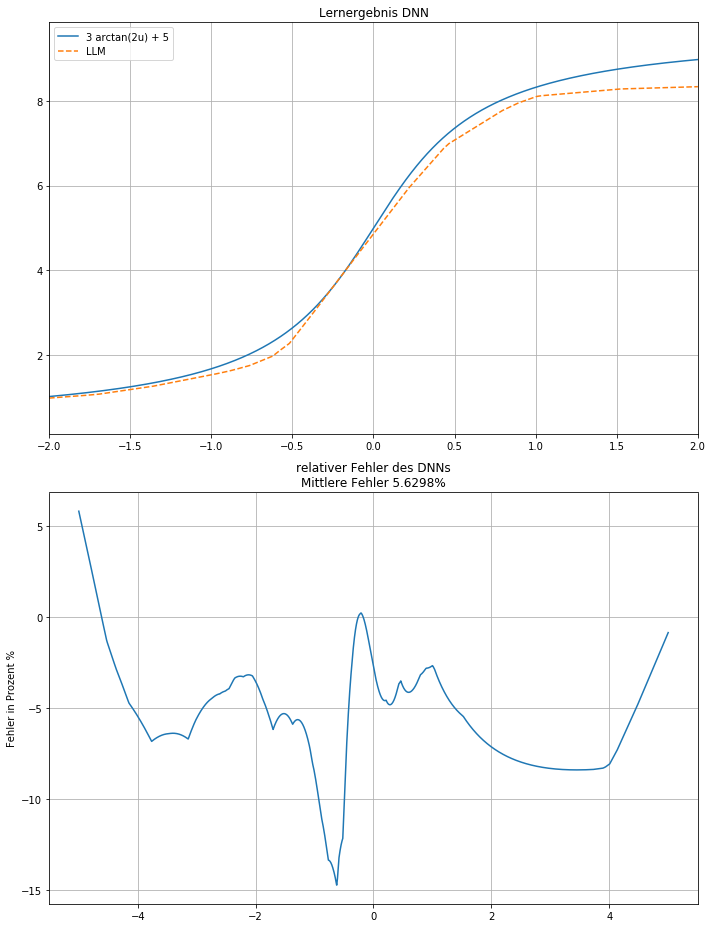

In [3]:
u = np.reshape(np.linspace(-5, 5, 5000), (5000, 1))
y_pred = np.reshape(dnn.predict(x={'X': u.astype(np.float32)}, as_iterable=False), (-1, 1))

fig = plt.figure(figsize=(10, 13))

plt.subplot(2,1,1)
plt.title(f"Lernergebnis DNN")
plt.grid(True)
plt.plot(u, nl(u), label=f"3 arctan(2u) + 5")
plt.plot(u, y_pred, '--', label="LLM")
plt.xlim((-2, 2))
plt.legend()

plt.subplot(2,1,2)
plt.title(f"relativer Fehler des DNNs\nMittlere Fehler {np.abs(100*((y_pred/nl(u)) - 1)).mean():.4f}%")
plt.ylabel("Fehler in Prozent %")
plt.grid(True)
plt.plot(u, 100*((y_pred/nl(u)) - 1))
#plt.legend()

plt.tight_layout()
plt.show()